In [16]:
from hamp_pred.src.predictor import Predictor
from hamp_pred.src.predictor_config import DEFAULT_CONF, PredictionConfig,SEQ_ENCODING_EXTERNAL
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from Bio import SeqIO
from external.SequenceEncoding.SequenceEncoding import SequenceEncoding, get_dict
from hamp_pred.src.input_prep.encode import OneHotEncoderSeq, RadianEncoder, MixedEncoder
from hamp_pred.src.input_prep.prepare_sequence import MultiChainOperator, SeqWindow
from hamp_pred.src.models.common.models import BaseConvolutionalWrapper, BaseLinearWrapper
from keras.utils.vis_utils import plot_model
from Bio.PDB.PDBParser import PDBParser
import os

In [17]:
data = pd.read_csv('../data/input/helix_find.csv')

In [3]:

operator = MultiChainOperator(OneHotEncoderSeq(), SeqWindow(200, 200), None,  SeqWindow(200, 200, null_char=[[0]]))

SEQ_ENCODING = PredictionConfig(BaseConvolutionalWrapper,
                                        operator,
                                        {'activation': 'sigmoid'})
pred = Predictor('helix_find', config=SEQ_ENCODING)
res = pred.predict(['TRPIIELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDRTLLMAGVSHDLRTPLTRIRLATEMMSEQDGYLAESINKDIEECNAIIEQFIDYLRTGQEMPMEMADLNAVLGEVIAAEEIETALYIEVKMHPLSIKRAVANMVVNAARYGNGWIKVSSGTEPRAWFQVEDDGPGIAPETGLGLAIVQRIVDNHNGMLELGLSIRAWLPVP'])

Encoded 1/2 sequences
Encoded 2/2 sequences


2022-09-16 14:15:48.083804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 14:15:50.658207: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7390 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1
2022-09-16 14:15:50.687200: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7388 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1
2022-09-16 14:15:56.338133: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-09-16 14:15:59.902836: I

1/1 [==============================] - 12s 12s/step


In [4]:
def get_helices(result):
    data = {}
    thr = 0.8
    window = 7 
    start =0 
    for ind, row in result.iterrows():
        pos, al = 0,0 
        ap = 0
        df =0 
        start =0 
        cp = None
        helises = []
        for n, res in enumerate(row['prediction']):
            if res[0] > 0.5:
                pos+=1
            if n - start >= window - 1:
                res = pos / (n-start + 1)
                if res <= thr:
                    if cp: 
                        helises.append(row['sequence'][n-cp +1:n+1])
                        cp = None
                        start = n
                    else:
                        start += 1
                else:
                    cp = n -start +1
        if cp: 
            helises.append(row['sequence'][n-cp +1:n+1])
        ml = len(min(helises, key=len))
        helises = [h for h in helises if len(h) == ml]
        data[row['id']] = ''.join(helises)            
    return data

In [5]:
d3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
 'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
 'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
 'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
def get_sequence(record):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('struct', record)    
    for model in structure:
        for chain in model:
            seq = []
            for residue in chain:
                if residue.resname in d3to1:
                    seq.append(d3to1[residue.resname])
        return ''.join(seq)

In [6]:
get_helices(res)

{0: 'ELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDRTLLMAGVSHDLRTPLT'}

In [7]:
get_helices(res)

{0: 'ELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDRTLLMAGVSHDLRTPLT'}

In [67]:
4.5663823e-10 >0.0000000000004

True

In [161]:
plot_model(pred.md(['AA'])._model, show_shapes=True, show_layer_names=True)

Encoded 1/1 sequences
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [4]:
pred = Predictor('hamp_rot', config=DEFAULT_CONF)
pred.train("")
# pred.predict(['PLNQLVTASQRIEELGLLAKTFNQMS']).iloc[0].prediction

Encoded 1/4305 sequences
Encoded 2/4305 sequences
Encoded 3/4305 sequences
Encoded 4/4305 sequences
Encoded 5/4305 sequences
Encoded 6/4305 sequences
Encoded 7/4305 sequences
Encoded 8/4305 sequences
Encoded 9/4305 sequences
Encoded 10/4305 sequences
Encoded 11/4305 sequences
Encoded 12/4305 sequences
Encoded 13/4305 sequences
Encoded 14/4305 sequences
Encoded 15/4305 sequences
Encoded 16/4305 sequences
Encoded 17/4305 sequences
Encoded 18/4305 sequences
Encoded 19/4305 sequences
Encoded 20/4305 sequences
Encoded 21/4305 sequences
Encoded 22/4305 sequences
Encoded 23/4305 sequences
Encoded 24/4305 sequences
Encoded 25/4305 sequences
Encoded 26/4305 sequences
Encoded 27/4305 sequences
Encoded 28/4305 sequences
Encoded 29/4305 sequences
Encoded 30/4305 sequences
Encoded 31/4305 sequences
Encoded 32/4305 sequences
Encoded 33/4305 sequences
Encoded 34/4305 sequences
Encoded 35/4305 sequences
Encoded 36/4305 sequences
Encoded 37/4305 sequences
Encoded 38/4305 sequences
Encoded 39/4305 seque

Encoded 1779/4305 sequences
Encoded 1780/4305 sequences
Encoded 1781/4305 sequences
Encoded 1782/4305 sequences
Encoded 1783/4305 sequences
Encoded 1784/4305 sequences
Encoded 1785/4305 sequences
Encoded 1786/4305 sequences
Encoded 1787/4305 sequences
Encoded 1788/4305 sequences
Encoded 1789/4305 sequences
Encoded 1790/4305 sequences
Encoded 1791/4305 sequences
Encoded 1792/4305 sequences
Encoded 1793/4305 sequences
Encoded 1794/4305 sequences
Encoded 1795/4305 sequences
Encoded 1796/4305 sequences
Encoded 1797/4305 sequences
Encoded 1798/4305 sequences
Encoded 1799/4305 sequences
Encoded 1800/4305 sequences
Encoded 1801/4305 sequences
Encoded 1802/4305 sequences
Encoded 1803/4305 sequences
Encoded 1804/4305 sequences
Encoded 1805/4305 sequences
Encoded 1806/4305 sequences
Encoded 1807/4305 sequences
Encoded 1808/4305 sequences
Encoded 1809/4305 sequences
Encoded 1810/4305 sequences
Encoded 1811/4305 sequences
Encoded 1812/4305 sequences
Encoded 1813/4305 sequences
Encoded 1814/4305 se

Encoded 3606/4305 sequences
Encoded 3607/4305 sequences
Encoded 3608/4305 sequences
Encoded 3609/4305 sequences
Encoded 3610/4305 sequences
Encoded 3611/4305 sequences
Encoded 3612/4305 sequences
Encoded 3613/4305 sequences
Encoded 3614/4305 sequences
Encoded 3615/4305 sequences
Encoded 3616/4305 sequences
Encoded 3617/4305 sequences
Encoded 3618/4305 sequences
Encoded 3619/4305 sequences
Encoded 3620/4305 sequences
Encoded 3621/4305 sequences
Encoded 3622/4305 sequences
Encoded 3623/4305 sequences
Encoded 3624/4305 sequences
Encoded 3625/4305 sequences
Encoded 3626/4305 sequences
Encoded 3627/4305 sequences
Encoded 3628/4305 sequences
Encoded 3629/4305 sequences
Encoded 3630/4305 sequences
Encoded 3631/4305 sequences
Encoded 3632/4305 sequences
Encoded 3633/4305 sequences
Encoded 3634/4305 sequences
Encoded 3635/4305 sequences
Encoded 3636/4305 sequences
Encoded 3637/4305 sequences
Encoded 3638/4305 sequences
Encoded 3639/4305 sequences
Encoded 3640/4305 sequences
Encoded 3641/4305 se

Encoded 654/4305 sequences
Encoded 655/4305 sequences
Encoded 656/4305 sequences
Encoded 657/4305 sequences
Encoded 658/4305 sequences
Encoded 659/4305 sequences
Encoded 660/4305 sequences
Encoded 661/4305 sequences
Encoded 662/4305 sequences
Encoded 663/4305 sequences
Encoded 664/4305 sequences
Encoded 665/4305 sequences
Encoded 666/4305 sequences
Encoded 667/4305 sequences
Encoded 668/4305 sequences
Encoded 669/4305 sequences
Encoded 670/4305 sequences
Encoded 671/4305 sequences
Encoded 672/4305 sequences
Encoded 673/4305 sequences
Encoded 674/4305 sequences
Encoded 675/4305 sequences
Encoded 676/4305 sequences
Encoded 677/4305 sequences
Encoded 678/4305 sequences
Encoded 679/4305 sequences
Encoded 680/4305 sequences
Encoded 681/4305 sequences
Encoded 682/4305 sequences
Encoded 683/4305 sequences
Encoded 684/4305 sequences
Encoded 685/4305 sequences
Encoded 686/4305 sequences
Encoded 687/4305 sequences
Encoded 688/4305 sequences
Encoded 689/4305 sequences
Encoded 690/4305 sequences
E

Encoded 2980/4305 sequences
Encoded 2981/4305 sequences
Encoded 2982/4305 sequences
Encoded 2983/4305 sequences
Encoded 2984/4305 sequences
Encoded 2985/4305 sequences
Encoded 2986/4305 sequences
Encoded 2987/4305 sequences
Encoded 2988/4305 sequences
Encoded 2989/4305 sequences
Encoded 2990/4305 sequences
Encoded 2991/4305 sequences
Encoded 2992/4305 sequences
Encoded 2993/4305 sequences
Encoded 2994/4305 sequences
Encoded 2995/4305 sequences
Encoded 2996/4305 sequences
Encoded 2997/4305 sequences
Encoded 2998/4305 sequences
Encoded 2999/4305 sequences
Encoded 3000/4305 sequences
Encoded 3001/4305 sequences
Encoded 3002/4305 sequences
Encoded 3003/4305 sequences
Encoded 3004/4305 sequences
Encoded 3005/4305 sequences
Encoded 3006/4305 sequences
Encoded 3007/4305 sequences
Encoded 3008/4305 sequences
Encoded 3009/4305 sequences
Encoded 3010/4305 sequences
Encoded 3011/4305 sequences
Encoded 3012/4305 sequences
Encoded 3013/4305 sequences
Encoded 3014/4305 sequences
Encoded 3015/4305 se

[[[ -3.5434945 ]
  [ -3.36484792]
  [ -2.52858527]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  4.05581453]
  [  2.47482871]
  [  3.35909195]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[ 12.69329579]
  [  9.54585652]
  [  8.97902258]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 ...

 [[-11.24816614]
  [-26.17834198]
  [-35.41082097]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[ -7.69057139]
  [-23.11194323]
  [-33.01679396]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  8.04237335]
  [ -6.7799924 ]
  [-15.53217741]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]]


2022-09-14 12:00:03.021094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-14 12:00:03.955220: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7390 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1
2022-09-14 12:00:03.955747: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7388 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1


Epoch 1/60


2022-09-14 12:00:08.180725: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-09-14 12:00:08.439928: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-14 12:00:08.440636: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-14 12:00:08.440677: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-14 12:00:08.441382: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-14 12:00:08.441484: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


54/54 [==============================] - 7s 134ms/sample - loss: 0.0427 - mae: 0.1055 - val_loss: 0.0140 - val_mae: 0.0587 - lr: 0.0010
Epoch 2/60
54/54 [==============================] - 2s 34ms/sample - loss: 0.0134 - mae: 0.0614 - val_loss: 0.0120 - val_mae: 0.0600 - lr: 0.0010
Epoch 3/60
54/54 [==============================] - 2s 34ms/sample - loss: 0.0113 - mae: 0.0582 - val_loss: 0.0100 - val_mae: 0.0534 - lr: 0.0010
Epoch 4/60
54/54 [==============================] - 2s 33ms/sample - loss: 0.0104 - mae: 0.0548 - val_loss: 0.0098 - val_mae: 0.0473 - lr: 0.0010
Epoch 5/60
54/54 [==============================] - 2s 33ms/sample - loss: 0.0096 - mae: 0.0530 - val_loss: 0.0095 - val_mae: 0.0528 - lr: 0.0010
Epoch 6/60
54/54 [==============================] - 2s 34ms/sample - loss: 0.0086 - mae: 0.0484 - val_loss: 0.0079 - val_mae: 0.0493 - lr: 0.0010
Epoch 7/60
54/54 [==============================] - 2s 30ms/sample - loss: 0.0078 - mae: 0.0448 - val_loss: 0.0087 - val_mae: 0.0551 -

Epoch 56/60
54/54 [==============================] - 2s 30ms/sample - loss: 5.6666e-04 - mae: 0.0143 - val_loss: 5.0579e-04 - val_mae: 0.0129 - lr: 0.0010
Epoch 57/60
 0/54 [..............................] - ETA: 0s - loss: 6.1508e-04 - mae: 0.0150
Epoch 57: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
54/54 [==============================] - 2s 31ms/sample - loss: 6.0885e-04 - mae: 0.0149 - val_loss: 5.8822e-04 - val_mae: 0.0142 - lr: 0.0010
Epoch 58/60
54/54 [==============================] - 2s 34ms/sample - loss: 4.3092e-04 - mae: 0.0118 - val_loss: 3.5186e-04 - val_mae: 0.0109 - lr: 1.0000e-04
Epoch 59/60
54/54 [==============================] - 2s 34ms/sample - loss: 3.3734e-04 - mae: 0.0105 - val_loss: 3.0821e-04 - val_mae: 0.0100 - lr: 1.0000e-04
Epoch 60/60
54/54 [==============================] - 2s 34ms/sample - loss: 3.0571e-04 - mae: 0.0101 - val_loss: 2.8977e-04 - val_mae: 0.0099 - lr: 1.0000e-04


2022-09-14 12:01:57.305016: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: required broadcastable shapes
2022-09-14 12:01:57.305104: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError: Graph execution error:

Detected at node 'mean_squared_error/SquaredDifference' defined at (most recent call last):
    File "/home/users/awinski/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/users/awinski/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/users/awinski/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/users/awinski/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/users/awinski/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_7749/242702832.py", line 2, in <cell line: 2>
      pred.train("")
    File "/home/users/awinski/ma_predictor/ma_predictor/src/predictor.py", line 47, in train
      return train.run(data, self.config.dump())
    File "/home/users/awinski/ma_predictor/ma_predictor/src/models/hamp_rot/train.py", line 31, in run
      results = model.test(test[0], test[1])
    File "/home/users/awinski/ma_predictor/ma_predictor/src/models/common/models.py", line 72, in test
      result = self._model.evaluate(*args, **kwargs)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1501, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1327, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'mean_squared_error/SquaredDifference'
required broadcastable shapes
	 [[{{node mean_squared_error/SquaredDifference}}]] [Op:__inference_test_function_47910]

In [8]:
exp_hamps = [
    # NarQ
    ['5iji.pdb', 179, 207, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['5jeq.pdb', 179, 207, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['5jef.pdb', 179, 207, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['5jgp.pdb', 179, 207, 13, 'A', 'B', 'a', 'lightgrey', ''],
    
    # HAMP Af1503
    ['2l7h.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['2l7i.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['2y0q.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['2y20.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['2y21.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['Murray.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''], # not published
    
    # HAMP-DhP
    ['3zrx.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['3zrv.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['3zrw.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['3zcc.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['2lfr.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['2lfs.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['4cti.pdb', 283, 311, 13, 'C', 'D', 'a', 'lightgrey', ''],
    
    ['3zx6.pdb', 7, 35, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['4cq4.pdb', 283, 311, 13, 'A', 'B', 'a', 'lightgrey', ''],
    ['4gn0.pdb', 253, 281, 13, 'A', 'C', 'a', 'lightgrey', ''],
    ['4i5s.pdb', 40, 67, 13, 'A', 'B', 'a', 'lightgrey', ''],
    
    ['f6_AB.pdb', 30, 57, 13, 'A', 'B', 'a', 'orange', '1'], #orange
    ['f6_AB.pdb', 75, 104, 13, 'A', 'B', 'a', 'limegreen', '2'], #limegreen
    ['f6_AB.pdb', 122, 154, 13, 'A', 'B', 'a', 'orange', '3'], #orange
    ['f6_AB.pdb', 172, 201, 13, 'A', 'B', 'a', 'limegreen', '4'], #limegreen
    ['f6_AB.pdb', 219, 246, 13, 'A', 'B', 'a', 'orange', '5'], #orange
    
    ['3lnr.pdb', 13, 40, 13, 'A', 'B', 'a', 'lightgrey', '1x'],   # lightcoral
    ['3lnr.pdb', 68, 96, 13, 'A', 'B', 'a', 'lightgrey', '2x'],  # deepskyblue
    ['3lnr.pdb', 114, 140, 13, 'A', 'B', 'a', 'lightgrey', '3x'], # lightcoral
    
    ['4i3m.pdb', 13, 40, 13, 'A', 'B', 'a', 'lightgrey', '1x'],
    ['4i3m.pdb', 68, 96, 13, 'A', 'B', 'a', 'lightgrey', '2x'],
    ['4i3m.pdb', 114, 140, 13, 'A', 'B', 'a', 'lightgrey', '3x'],
    
    ['4i44.pdb', 13, 40, 13, 'A', 'B', 'a', 'lightgrey', '1x'],
    ['4i44.pdb', 68, 96, 13, 'A', 'B', 'a', 'lightgrey', '2x'],
    ['4i44.pdb', 114, 140, 13, 'A', 'B', 'a', 'lightgrey', '3x'],
     
]

results = {}
for exp_hamp in exp_hamps:
    #if exp_hamp[0] not in '3lnr.pdb': continue
        
    pdb_file = f'../../TCST/struct_in/{exp_hamp[0]}'
    if os.path.exists(pdb_file):
        seq = get_sequence(pdb_file)
        print("SEQ:", seq)
        if seq:
            res = pred.predict([seq])
            res = get_helices(res)

            results[exp_hamp[0]] = res[0]
        
  
       
    
    

SEQ: GSHMSTITRPIIELSNTADKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVAME
Encoded 1/1 sequences
1/1 [==============================] - 1s 879ms/step
SEQ: GSHMSTITRPIIELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVAME
Encoded 1/1 sequences
1/1 [==============================] - 1s 751ms/step
SEQ: STITRPIIELSNTCDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVAM
Encoded 1/1 sequences
1/1 [==============================] - 1s 750ms/step
SEQ: GSHMSTITRPIIELSNTIDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVAM
Encoded 1/1 sequences
1/1 [==============================] - 1s 776ms/step
SEQ: MSTITRPIIELSNTVDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVA
Encoded 1/1 sequences
1/1 [==============================] - 1s 763ms/step
SEQ: 
SEQ: TITRPIIELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDRTLLMAGVSHDLRTPLTRIRLATEMMSEQDGYLAESINKDIEECNAIIEQFIDYLR
Encoded 1/1 sequences
1/1 [==============================] - 1s 748ms/step
SEQ: STITRPIIELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDRTLLMAGVSHDLRTPLTRIRLATEMMSEQDGYLAESINKDIEECNAIIEQFIDYL
Enc

In [133]:
results

{'2l7h.pdb': 'TITRPIIELSNTADKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVA',
 '2l7i.pdb': 'TITRPIIELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVA',
 '2y0q.pdb': 'PIIELSNTCDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVAM',
 '2y20.pdb': 'TITRPIIELSNTIDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKVA',
 '2y21.pdb': 'PIIELSNTVDKIAEGNLEAEVPHQNRADEIGIILAKSIERLRRSLKVA',
 '3zrx.pdb': 'PIIELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDRTLLMAGVSHDLRTPLTRIRLATEMMSEQDGYLAESINKDIEEECNAIIEQFIDYLR',
 '3zrv.pdb': 'PIIELSNTFDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDRTLLMAGVSHDLRTPLTRIRLATEMMSEQDGYLAESINKDIEEECNAIIEQFIDYL',
 '3zrw.pdb': 'PIIELSNTVDKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQQADDRTLLMAGVSHDLRTPLTRIRLATEMMSEQDGYLAESINKDIEEECNAIIEQFIDYL',
 '3zcc.pdb': 'PIIELSNTADKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDGTLLMAGVSHDLRTPLTRIRLATEMMSEQDGYLAESINKDIEEECNAIIEQFIDYL',
 '2lfr.pdb': 'PIIELSNTADKIAEGNLEAEVPHQNRADEIGILAKSIERLRRSLKQLADDRTLLMAGVSHDLRTPLTRIRLATEMMSEQDGYLAESINKDIEEECNAIIEQFIDYLR',
 '2lfs.pdb': 'PIIELSNTFDKIAEGNLEAEVPHQNRADEIGILAK

In [33]:
test_data = pd.read_pickle('../../TCST/hamp_svm/pdb_measure.p')
# usuwanie mutantow
# 3lnr nie jest mutantem, ale bywa problematyczny
test_data.rename(columns={'seq1':'n_seq', 'seq2':'c_seq'}, inplace=True)
# test_data=test_data.drop(['5jeq.pdb',
#             '5jef.pdb',
#             '3zrv.pdb',
#             '2lfs.pdb',
#             '3zrw.pdb',
#             '3zcc.pdb',
#             '2l7i.pdb', '2y20.pdb', '2y21.pdb', '2y0q.pdb',
                    
#             '3lnr.pdb', 
#                     '4i44.pdb', '4i3m.pdb'

           
#            ])
test_data

,n_rot,c_rot,n_seq,c_seq,color,n_list,c_list,label,rot,rot_mean,rot_std
pdb,,,,,,,,,,,
5iji.pdb,-4.087357,7.779974,PLNQLVTASQRIE,ELGLLAKTFNQMS,lightgrey,"[13.777868219219764, 13.777881762926915, 119.5...","[30.493526849602862, 30.493535314123623, 134.4...",,"[-16.715658630383103, -16.71565355119671, -14....",-11.867330,3.992330
5jeq.pdb,-1.240361,-7.473836,PLNQLVTASQRIE,ELGLLAKTFNQMS,lightgrey,"[17.56552238683581, 17.565522480639437, 122.45...","[27.56734968516175, 27.567362194054645, 130.05...",,"[-10.001827298325935, -10.001839713415222, -7....",6.233475,9.582532
5jef.pdb,4.383736,2.781244,PLNQLVTASQRIE,ELGLLAKTFNQMS,lightgrey,"[16.615564490798363, 16.42797345412655, 123.25...","[26.010083152793875, 30.234989987010515, 131.2...",,"[-9.394518661995505, -13.80701653288395, -8.01...",1.602492,6.259401
5jgp.pdb,-3.784887,8.901354,PLNQLVTASQRIE,ELGLLAKTFNQMS,lightgrey,"[12.806376191183421, 12.806403830524141, 119.3...","[32.29685745112175, 32.296871556181934, 135.42...",,"[-19.49048125993832, -19.490467725657794, -16....",-12.686241,3.274968
2l7h.pdb,-19.296311,8.163004,PIIELSNTADKIA,EIGILAKSIERLR,lightgrey,"[10.691315672199803, 9.348497498684193, 111.53...","[32.455168941464386, 33.71397672760067, 133.01...",,"[-21.763853269264587, -24.365479228916485, -21...",-27.459314,4.259076
2l7i.pdb,0.212011,3.933485,PIIELSNTFDKIA,EIGILAKSIERLR,lightgrey,"[30.046690141042358, 29.870238899710994, 129.9...","[31.616712595216924, 31.75597800104769, 132.18...",,"[-1.5700224541745627, -1.8857391013366964, -2....",-3.721474,2.435628
2y0q.pdb,-17.979150,1.242494,PIIELSNTCDKIA,EIGILAKSIERLR,lightgrey,"[8.749455296510142, 8.332247502951414, 109.794...","[30.54133645838112, 35.05620448184783, 133.773...",,"[-21.791881161870975, -26.72395697889641, -23....",-19.221644,4.166560
2y20.pdb,-18.736343,7.062672,PIIELSNTIDKIA,EIGILAKSIERLR,lightgrey,"[4.8490254206099, 7.353972968995644, 105.26845...","[38.23368741211337, 38.50687202988876, 141.637...",,"[-33.384661991503464, -31.152899060893105, -36...",-25.799014,6.038796
2y21.pdb,-17.299223,3.459582,PIIELSNTVDKIA,EIGILAKSIERLR,lightgrey,"[7.083678891068137, 7.243731692449341, 108.815...","[31.662792594798677, 30.919029152280665, 134.1...",,"[-24.579113703730542, -23.675297459831313, -25...",-20.758804,3.242909


In [32]:
pred_rot = Predictor('hamp_rot', config=DEFAULT_CONF)
pred_rot.train("")

Encoded 1/4305 sequences
Encoded 2/4305 sequences
Encoded 3/4305 sequences
Encoded 4/4305 sequences
Encoded 5/4305 sequences
Encoded 6/4305 sequences
Encoded 7/4305 sequences
Encoded 8/4305 sequences
Encoded 9/4305 sequences
Encoded 10/4305 sequences
Encoded 11/4305 sequences
Encoded 12/4305 sequences
Encoded 13/4305 sequences
Encoded 14/4305 sequences
Encoded 15/4305 sequences
Encoded 16/4305 sequences
Encoded 17/4305 sequences
Encoded 18/4305 sequences
Encoded 19/4305 sequences
Encoded 20/4305 sequences
Encoded 21/4305 sequences
Encoded 22/4305 sequences
Encoded 23/4305 sequences
Encoded 24/4305 sequences
Encoded 25/4305 sequences
Encoded 26/4305 sequences
Encoded 27/4305 sequences
Encoded 28/4305 sequences
Encoded 29/4305 sequences
Encoded 30/4305 sequences
Encoded 31/4305 sequences
Encoded 32/4305 sequences
Encoded 33/4305 sequences
Encoded 34/4305 sequences
Encoded 35/4305 sequences
Encoded 36/4305 sequences
Encoded 37/4305 sequences
Encoded 38/4305 sequences
Encoded 39/4305 seque

Encoded 1729/4305 sequences
Encoded 1730/4305 sequences
Encoded 1731/4305 sequences
Encoded 1732/4305 sequences
Encoded 1733/4305 sequences
Encoded 1734/4305 sequences
Encoded 1735/4305 sequences
Encoded 1736/4305 sequences
Encoded 1737/4305 sequences
Encoded 1738/4305 sequences
Encoded 1739/4305 sequences
Encoded 1740/4305 sequences
Encoded 1741/4305 sequences
Encoded 1742/4305 sequences
Encoded 1743/4305 sequences
Encoded 1744/4305 sequences
Encoded 1745/4305 sequences
Encoded 1746/4305 sequences
Encoded 1747/4305 sequences
Encoded 1748/4305 sequences
Encoded 1749/4305 sequences
Encoded 1750/4305 sequences
Encoded 1751/4305 sequences
Encoded 1752/4305 sequences
Encoded 1753/4305 sequences
Encoded 1754/4305 sequences
Encoded 1755/4305 sequences
Encoded 1756/4305 sequences
Encoded 1757/4305 sequences
Encoded 1758/4305 sequences
Encoded 1759/4305 sequences
Encoded 1760/4305 sequences
Encoded 1761/4305 sequences
Encoded 1762/4305 sequences
Encoded 1763/4305 sequences
Encoded 1764/4305 se

Encoded 3495/4305 sequences
Encoded 3496/4305 sequences
Encoded 3497/4305 sequences
Encoded 3498/4305 sequences
Encoded 3499/4305 sequences
Encoded 3500/4305 sequences
Encoded 3501/4305 sequences
Encoded 3502/4305 sequences
Encoded 3503/4305 sequences
Encoded 3504/4305 sequences
Encoded 3505/4305 sequences
Encoded 3506/4305 sequences
Encoded 3507/4305 sequences
Encoded 3508/4305 sequences
Encoded 3509/4305 sequences
Encoded 3510/4305 sequences
Encoded 3511/4305 sequences
Encoded 3512/4305 sequences
Encoded 3513/4305 sequences
Encoded 3514/4305 sequences
Encoded 3515/4305 sequences
Encoded 3516/4305 sequences
Encoded 3517/4305 sequences
Encoded 3518/4305 sequences
Encoded 3519/4305 sequences
Encoded 3520/4305 sequences
Encoded 3521/4305 sequences
Encoded 3522/4305 sequences
Encoded 3523/4305 sequences
Encoded 3524/4305 sequences
Encoded 3525/4305 sequences
Encoded 3526/4305 sequences
Encoded 3527/4305 sequences
Encoded 3528/4305 sequences
Encoded 3529/4305 sequences
Encoded 3530/4305 se

Encoded 802/4305 sequences
Encoded 803/4305 sequences
Encoded 804/4305 sequences
Encoded 805/4305 sequences
Encoded 806/4305 sequences
Encoded 807/4305 sequences
Encoded 808/4305 sequences
Encoded 809/4305 sequences
Encoded 810/4305 sequences
Encoded 811/4305 sequences
Encoded 812/4305 sequences
Encoded 813/4305 sequences
Encoded 814/4305 sequences
Encoded 815/4305 sequences
Encoded 816/4305 sequences
Encoded 817/4305 sequences
Encoded 818/4305 sequences
Encoded 819/4305 sequences
Encoded 820/4305 sequences
Encoded 821/4305 sequences
Encoded 822/4305 sequences
Encoded 823/4305 sequences
Encoded 824/4305 sequences
Encoded 825/4305 sequences
Encoded 826/4305 sequences
Encoded 827/4305 sequences
Encoded 828/4305 sequences
Encoded 829/4305 sequences
Encoded 830/4305 sequences
Encoded 831/4305 sequences
Encoded 832/4305 sequences
Encoded 833/4305 sequences
Encoded 834/4305 sequences
Encoded 835/4305 sequences
Encoded 836/4305 sequences
Encoded 837/4305 sequences
Encoded 838/4305 sequences
E

Encoded 2248/4305 sequences
Encoded 2249/4305 sequences
Encoded 2250/4305 sequences
Encoded 2251/4305 sequences
Encoded 2252/4305 sequences
Encoded 2253/4305 sequences
Encoded 2254/4305 sequences
Encoded 2255/4305 sequences
Encoded 2256/4305 sequences
Encoded 2257/4305 sequences
Encoded 2258/4305 sequences
Encoded 2259/4305 sequences
Encoded 2260/4305 sequences
Encoded 2261/4305 sequences
Encoded 2262/4305 sequences
Encoded 2263/4305 sequences
Encoded 2264/4305 sequences
Encoded 2265/4305 sequences
Encoded 2266/4305 sequences
Encoded 2267/4305 sequences
Encoded 2268/4305 sequences
Encoded 2269/4305 sequences
Encoded 2270/4305 sequences
Encoded 2271/4305 sequences
Encoded 2272/4305 sequences
Encoded 2273/4305 sequences
Encoded 2274/4305 sequences
Encoded 2275/4305 sequences
Encoded 2276/4305 sequences
Encoded 2277/4305 sequences
Encoded 2278/4305 sequences
Encoded 2279/4305 sequences
Encoded 2280/4305 sequences
Encoded 2281/4305 sequences
Encoded 2282/4305 sequences
Encoded 2283/4305 se

Encoded 3969/4305 sequences
Encoded 3970/4305 sequences
Encoded 3971/4305 sequences
Encoded 3972/4305 sequences
Encoded 3973/4305 sequences
Encoded 3974/4305 sequences
Encoded 3975/4305 sequences
Encoded 3976/4305 sequences
Encoded 3977/4305 sequences
Encoded 3978/4305 sequences
Encoded 3979/4305 sequences
Encoded 3980/4305 sequences
Encoded 3981/4305 sequences
Encoded 3982/4305 sequences
Encoded 3983/4305 sequences
Encoded 3984/4305 sequences
Encoded 3985/4305 sequences
Encoded 3986/4305 sequences
Encoded 3987/4305 sequences
Encoded 3988/4305 sequences
Encoded 3989/4305 sequences
Encoded 3990/4305 sequences
Encoded 3991/4305 sequences
Encoded 3992/4305 sequences
Encoded 3993/4305 sequences
Encoded 3994/4305 sequences
Encoded 3995/4305 sequences
Encoded 3996/4305 sequences
Encoded 3997/4305 sequences
Encoded 3998/4305 sequences
Encoded 3999/4305 sequences
Encoded 4000/4305 sequences
Encoded 4001/4305 sequences
Encoded 4002/4305 sequences
Encoded 4003/4305 sequences
Encoded 4004/4305 se

Epoch 1/60
54/54 [==============================] - 6s 107ms/sample - loss: 0.1153 - mae: 0.1742 - val_loss: 0.0140 - val_mae: 0.0577 - lr: 0.0010
Epoch 2/60
54/54 [==============================] - 2s 32ms/sample - loss: 0.0149 - mae: 0.0646 - val_loss: 0.0136 - val_mae: 0.0576 - lr: 0.0010
Epoch 3/60
54/54 [==============================] - 2s 32ms/sample - loss: 0.0137 - mae: 0.0615 - val_loss: 0.0134 - val_mae: 0.0663 - lr: 0.0010
Epoch 4/60
54/54 [==============================] - 2s 31ms/sample - loss: 0.0122 - mae: 0.0594 - val_loss: 0.0106 - val_mae: 0.0536 - lr: 0.0010
Epoch 5/60
54/54 [==============================] - 2s 32ms/sample - loss: 0.0107 - mae: 0.0541 - val_loss: 0.0099 - val_mae: 0.0537 - lr: 0.0010
Epoch 6/60
54/54 [==============================] - 1s 27ms/sample - loss: 0.0115 - mae: 0.0581 - val_loss: 0.0136 - val_mae: 0.0710 - lr: 0.0010
Epoch 7/60
54/54 [==============================] - 2s 32ms/sample - loss: 0.0099 - mae: 0.0547 - val_loss: 0.0094 - val_ma

54/54 [==============================] - 2s 28ms/sample - loss: 9.1241e-04 - mae: 0.0168 - val_loss: 9.3305e-04 - val_mae: 0.0183 - lr: 0.0010
Epoch 57/60
54/54 [==============================] - 2s 31ms/sample - loss: 8.7227e-04 - mae: 0.0164 - val_loss: 7.8159e-04 - val_mae: 0.0165 - lr: 0.0010
Epoch 58/60
54/54 [==============================] - 1s 28ms/sample - loss: 9.6769e-04 - mae: 0.0177 - val_loss: 0.0011 - val_mae: 0.0193 - lr: 0.0010
Epoch 59/60
54/54 [==============================] - 1s 28ms/sample - loss: 9.4133e-04 - mae: 0.0174 - val_loss: 8.5639e-04 - val_mae: 0.0158 - lr: 0.0010
Epoch 60/60
54/54 [==============================] - 2s 31ms/sample - loss: 8.1755e-04 - mae: 0.0161 - val_loss: 7.7597e-04 - val_mae: 0.0174 - lr: 0.0010


2022-09-16 14:29:45.624012: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: required broadcastable shapes
2022-09-16 14:29:45.624092: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError: Graph execution error:

Detected at node 'mean_squared_error/SquaredDifference' defined at (most recent call last):
    File "/home/users/awinski/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/users/awinski/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/users/awinski/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/users/awinski/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/users/awinski/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_6397/2439647867.py", line 2, in <cell line: 2>
      pred_rot.train("")
    File "/home/users/awinski/ma_predictor/ma_predictor/src/predictor.py", line 51, in train
      return train.run(data, self.config.dump())
    File "/home/users/awinski/ma_predictor/ma_predictor/src/models/hamp_rot/train.py", line 31, in run
      results = model.test(test[0], test[1])
    File "/home/users/awinski/ma_predictor/ma_predictor/src/models/common/models.py", line 72, in test
      result = self._model.evaluate(*args, **kwargs)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1501, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/users/awinski/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1327, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'mean_squared_error/SquaredDifference'
required broadcastable shapes
	 [[{{node mean_squared_error/SquaredDifference}}]] [Op:__inference_test_function_167784]

In [34]:
# %%capture


test_data['n_seq'] = test_data['n_seq'].apply(lambda x:x[1:-1])
test_data['c_seq'] = test_data['c_seq'].apply(lambda x:x[1:-1])
seq = []
tr = []
for n,r in test_data.iterrows():
    seq.append(r['n_seq'] + r['c_seq'])
    tr.append(np.mean((r['rot'][0::2] + r['rot'][1::2]) / 2)/2)
res = pred_rot.predict(seq)
pr = []
for n,r in res.iterrows():
    pr.append(np.mean(r['N_pred'])/2)


Encoded 1/35 sequences
Encoded 2/35 sequences
Encoded 3/35 sequences
Encoded 4/35 sequences
Encoded 5/35 sequences
Encoded 6/35 sequences
Encoded 7/35 sequences
Encoded 8/35 sequences
Encoded 9/35 sequences
Encoded 10/35 sequences
Encoded 11/35 sequences
Encoded 12/35 sequences
Encoded 13/35 sequences
Encoded 14/35 sequences
Encoded 15/35 sequences
Encoded 16/35 sequences
Encoded 17/35 sequences
Encoded 18/35 sequences
Encoded 19/35 sequences
Encoded 20/35 sequences
Encoded 21/35 sequences
Encoded 22/35 sequences
Encoded 23/35 sequences
Encoded 24/35 sequences
Encoded 25/35 sequences
Encoded 26/35 sequences
Encoded 27/35 sequences
Encoded 28/35 sequences
Encoded 29/35 sequences
Encoded 30/35 sequences
Encoded 31/35 sequences
Encoded 32/35 sequences
Encoded 33/35 sequences
Encoded 34/35 sequences
Encoded 35/35 sequences
Encoded 1/35 sequences
Encoded 2/35 sequences
Encoded 3/35 sequences
Encoded 4/35 sequences
Encoded 5/35 sequences
Encoded 6/35 sequences
Encoded 7/35 sequences
Encoded 

[5.363997936248779,
 5.363997936248779,
 5.363997936248779,
 5.363997936248779,
 -12.324518203735352,
 -10.53462028503418,
 -12.22605037689209,
 -10.488385200500488,
 -9.82938003540039,
 -9.664979934692383,
 -10.53462028503418,
 -10.53462028503418,
 -9.82938003540039,
 -12.324518203735352,
 -12.324518203735352,
 -10.53462028503418,
 -10.53462028503418,
 -9.82938003540039,
 -12.324518203735352,
 -12.324518203735352,
 -3.8796539306640625,
 8.599446296691895,
 7.427514553070068,
 -1.52020263671875,
 2.3719515800476074,
 -10.31875228881836,
 -3.219088077545166,
 -2.6365458965301514,
 -15.2491455078125,
 -1.1701099872589111,
 -2.6365458965301514,
 -15.2491455078125,
 -3.219088077545166,
 -2.6365458965301514,
 -15.2491455078125]

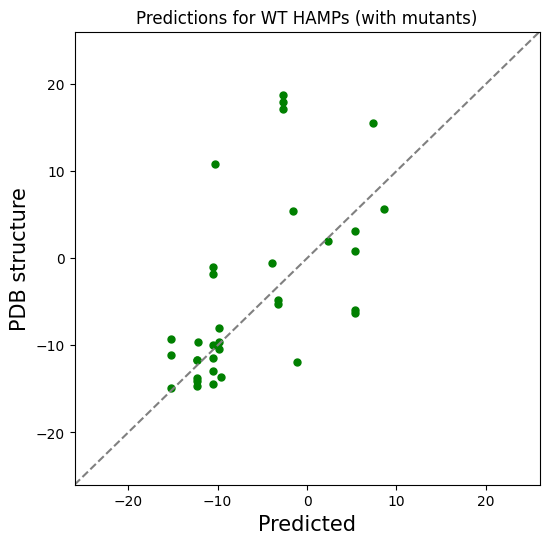

In [36]:
fig, ax = plt.subplots(1,1, figsize=(6, 6), dpi=100)
ax.scatter(pr, tr, color='green', s=25)
ax.set_ylim(-26, 26)
ax.set_xlim(-26, 26)
ax.plot([0, 1], [0, 1], '--', transform=ax.transAxes, color='grey')
ax.set_xlabel('Predicted', size=15)
ax.set_ylabel('PDB structure', size=15)
ax.set_title('Predictions for WT HAMPs (with mutants)')
pass

In [11]:
def analyse_rot(seq, start, end, net,
                max_att=10e10, higher=True, out_size=11):
    aa = 'RNDCQEAGHILKMFPSTWYV'
    pos = {}
    size = end - start + 1
    seqs = []
    mod = list(seq)
    for i in range(start, end):
        for j in aa:
            prev = mod[i]
            mod[i] = j
            if mod[i] != prev:
                seqs.append(''.join(mod))
            mod[i] = prev
    return seqs


def find_mutants(sequences, mod, inds, lim=10, mdiff=3):
    mutants = []
    res = {'idx': [], 'source_seq': [], 'mutants': []}
    c = 0
    for seq in sequences:
        tot = []
        N = analyse_rot(seq, 0, 11, mod)
        C = analyse_rot(seq, 11, 22, mod)
        curr = np.mean(mod.predict([seq])['N_pred'].iloc[0])
        resN = mod.predict(N)
        resN['mean_rot'] = resN['N_pred'].apply(lambda x: abs(np.mean(x)-curr))
        resN = resN[resN['mean_rot'] > mdiff]
        resN.sort_values(by='mean_rot', ascending=False, inplace=True)
        tot.extend(list(resN.sequence.values)[:lim])
        resC = mod.predict(C)
        resC['mean_rot'] = resC['N_pred'].apply(lambda x: abs(np.mean(x) - curr))
        resC = resC[resC['mean_rot'] > mdiff]
        resC.sort_values(by='mean_rot', ascending=False, inplace=True)
        tot.extend(list(resC.sequence.values)[:lim])
        res['idx'].extend([inds[c]] * len(tot))
        res['source_seq'].extend([seq] * len(tot))
        res['mutants'].extend(tot)
        c+=1
        if not c % 20:
            pd.DataFrame(res).drop_duplicates(subset=['mutants']).to_csv('hamp_mutants_for_af2.csv', index=False)
    return pd.DataFrame(res).drop_duplicates(subset=['mutants'])



In [ ]:
DATA_DIR = '/home/users/sdunin/calc/TCST'
data = f'{DATA_DIR}/offline_data/cache/af2_true_full.features.p'
data = pd.read_pickle(data)
data['n_seq'] = data['n_seq'].apply(lambda x: x[1:-1])
data['c_seq'] = data['c_seq'].apply(lambda x: x[1:-1])
data['train_seq'] = data.apply(lambda x: x['n_seq'] + x['c_seq'], axis=1)
data_df = pd.read_pickle(f'{DATA_DIR}/offline_data/cache/af2_true_full.p') 
msa = list(SeqIO.parse(f"{DATA_DIR}/offline_data/hamp/msa/final3.reb2.aln", "fasta"))
df = pd.DataFrame(
        [(str(i.seq).replace('-', ''), i.id) for i in msa],
    columns=['sequence', 'id']
)


In [ ]:
seqs = list(data['train_seq'].values)
inds = list(data.index.values)

In [ ]:
%%capture
mutants = find_mutants(seqs, pred, inds)
mutants.to_csv('hamp_mutants_for_af2.csv', index=False)

In [ ]:
list(pred.predict(['AAAAA']).sequence.values)

In [ ]:
data

In [ ]:
data_df

In [ ]:
df.iloc[6455]['sequence']

In [ ]:
'RRALAPLDRACAEAARVTALAGGDRLTEAGPAELRALLAAVNALLDRLGAAHR'.find('PLDRACAEAARVT')